### Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset

In [3]:
ds = pd.read_csv("dataset.csv")

In [4]:
ds.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
ds.shape

(50000, 2)

In [6]:
ds.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Above data is large (i.e. it has 50000 rows), we will take a sample size of 10000 (positive-> 9000 and negative-> 1000) Imbalenced Dataset

In [7]:
df_positive = ds[ds.sentiment == 'positive'][:9000]
df_negative = ds[ds.sentiment == 'negative'][:1000]

In [8]:
df_imb = pd.concat([df_positive,df_negative])

### Dealing with Imbalanced Dataset

In [9]:
df_imb.sentiment.value_counts()

positive    9000
negative    1000
Name: sentiment, dtype: int64

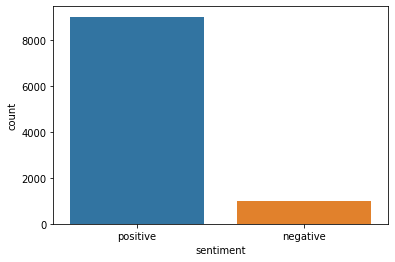

In [10]:
sns.countplot(data=df_imb, x=df_imb.sentiment)
plt.show()

As we can clearly point out the sample dataset is highly imbalance.

To resample the dataset we can either choose to undersample positive reviews or oversample negative reviews. In our case we will be going on with undersampling of positive reviews

#### Resampling

In [11]:
from imblearn.under_sampling import RandomUnderSampler

In [12]:
rus = RandomUnderSampler(random_state=0)
df_bal, df_bal['sentiment'] = rus.fit_resample(df_imb[['review']],df_imb['sentiment'])

In [13]:
df_bal.shape

(2000, 2)

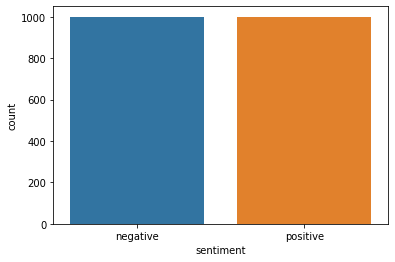

In [14]:
sns.countplot(data=df_bal, x=df_bal.sentiment)
plt.show()

### Spliting of dataset

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_bal.review, df_bal.sentiment, test_size=0.33, random_state=0)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1340,)
(660,)
(1340,)
(660,)


### Text representation 

Classifiers and learning algorithms expect numerical feature vectors rather than raw text documents. This is why we need to turn our movie review text into numerical vectors. There are many text representation techniques such as one-hot encoding, bag of words, and wor2vec.
For this simple, we’ll use bag of words (BOW) since we care about the frequency of the words in text reviews; however, the order of words is irrelevant. Two common ways to represent bag of words are CountVectorizer and Term Frequency, Inverse Document Frequency (TF-IDF).

__CountVectorizer__

The CountVectorizer gives us the frequency of occurrence of words in a document. Let’s consider the following sentences.

`review = [“I love writing code in Python. I love Python code”,
          “I hate writing code in Java. I hate Java code”]`

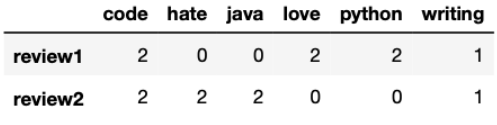

As you can see the numbers inside the matrix represent the number of times each word was mentioned in each review. Words like “love,” “hate,” and “code” have the same frequency (2) in this example.

__Term Frequency, Inverse Document Frequency (TF-IDF)__

The TF-IDF computes “weights” that represents how important a word is to a document in a collection of documents (aka corpus). The TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word.
The representation with TF-IDF will look like the picture below for the same text we used before.

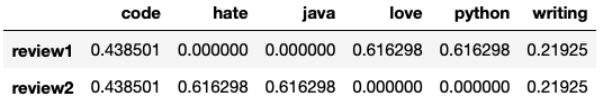

Unlike, the previous example the word “code” doesn’t have the same weight as the words “love” or “hate.” This happens because “code” appears in both reviews; therefore, its weight decreased.

### Turning our text data into numerical vectors

In our original dataset, we want to identify unique/representative words for positive reviews and negative reviews, so we’ll choose the TF-IDF. To turn text data into numerical vectors with TF-IDF, we write the following code.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(X_train)

In [20]:
train_x_vector

<1340x20351 sparse matrix of type '<class 'numpy.float64'>'
	with 118678 stored elements in Compressed Sparse Row format>

In [21]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=X_train.index,
                                  columns=tfidf.get_feature_names())

,00,000,007,01,01pm,02,04,06,08,10,...,zoology,zoom,zooming,zooms,zoot,élan,émigré,être,ísnt,ïn
295,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
364,0.084777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
862,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1751,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075529,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1403,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1216,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1653,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
test_x_vector = tfidf.transform(X_test)

### Model 

#### Support Vector Machines (SVM) 

In [23]:
from sklearn.svm import SVC

In [24]:
svc = SVC(kernel='linear')
svc.fit(train_x_vector,y_train)

SVC(kernel='linear')

#### Decision Tree 

In [25]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, y_train)

DecisionTreeClassifier()

#### Naive Bayes 

In [26]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), y_train)

GaussianNB()

#### Logistic Regression 

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x_vector, y_train)

LogisticRegression()

### Model Evaluation 

#### Mean Accuracy 

In [28]:
print(f"Support Vector Classifier : {svc.score(test_x_vector, y_test)}")
print(f"Decision Tree : {dec_tree.score(test_x_vector, y_test)}")
print(f"Naive Bayes : {gnb.score(test_x_vector.toarray(), y_test)}")
print(f"Logistic Regression : {log_reg.score(test_x_vector, y_test)}")

Support Vector Classifier : 0.8257575757575758
Decision Tree : 0.6681818181818182
Naive Bayes : 0.6333333333333333
Logistic Regression : 0.8106060606060606


__F1 Score__

F1 Score is the weighted average of Precision and Recall. Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Also, F1 takes into account how the data is distributed, so it’s useful when you have data with imbalance classes.

In [29]:
from sklearn.metrics import f1_score
f1_score(y_test, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

array([0.82861401, 0.82280431])

__Classification Report__

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svc.predict(test_x_vector), labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.79      0.87      0.83       321
    negative       0.86      0.79      0.82       339

    accuracy                           0.83       660
   macro avg       0.83      0.83      0.83       660
weighted avg       0.83      0.83      0.83       660



__Confusion Matrix__

In [31]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, 
                            svc.predict(test_x_vector), 
                            labels=['positive', 'negative'])

In [32]:
conf_mat

array([[278,  43],
       [ 72, 267]], dtype=int64)

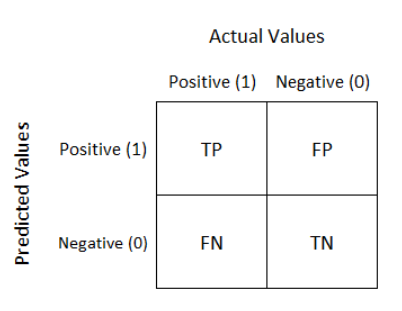

### Export Model 

As we can conclude SVM model has performed better than others, so we will proceed with SVM model for deployment

In [33]:
import pickle

In [34]:
pickle.dump(svc,open('svc-model.pkl','wb'))

In [35]:
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [36]:
text = "this is good"

In [37]:
text_vector = tfidf.transform(text)

ValueError: Iterable over raw text documents expected, string object received.

In [40]:
type(X_test)

pandas.core.series.Series

In [49]:
a=pd.Series(['this is good'])

In [51]:
a_ = tfidf.transform(a)

In [54]:
svc.predict(a_)[0]

'positive'